In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D, Activation

In [32]:
np.random.seed(0)
tf.random.set_seed(0)

In [33]:
(X_tn0, y_tn0), (X_te0, y_te0) = datasets.mnist.load_data()

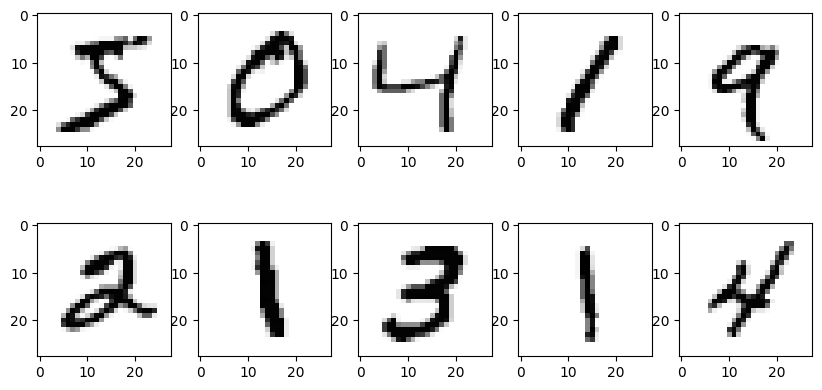

In [34]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_tn0[i].reshape((28, 28)), cmap="Greys")
plt.show()

In [35]:
X_tn_re = X_tn0.reshape(60000, 28, 28, 1)
X_tn = X_tn_re / 255
X_tn.shape

(60000, 28, 28, 1)

In [36]:
X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re / 255
X_te.shape

(10000, 28, 28, 1)

In [37]:
X_tn_noise = X_tn + np.random.uniform(-1, 1, size=X_tn.shape)
X_te_noise = X_te + np.random.uniform(-1, 1, size=X_te.shape)

In [38]:
X_tn_ns = np.clip(X_tn_noise, a_min=0, a_max=1)
X_te_ns = np.clip(X_te_noise, a_min=0, a_max=1)

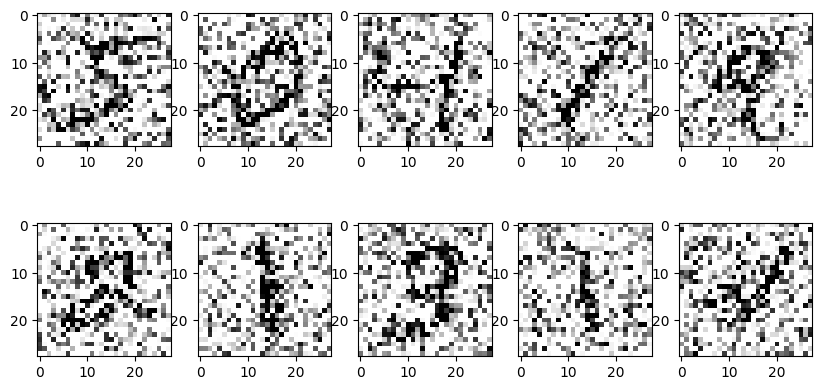

In [39]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_tn_ns[i].reshape((28, 28)), cmap="Greys")
plt.show()

In [40]:
input_layer1 = Input(shape=(28, 28, 1))
x1 = Conv2D(20, kernel_size=(5, 5), padding="same")(input_layer1)
x1 = Activation(activation="relu")(x1)
output_layer1 = MaxPool2D(pool_size=2, padding="same")(x1)
encoder = Model(input_layer1, output_layer1)
encoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)       ┃ Output Shape  ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_8      │ (None, 28,    │       0 │
│ (InputLayer)       │ 28, 1)        │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_8 (Conv2D)  │ (None, 28,    │     520 │
│                    │ 28, 20)       │         │
├────────────────────┼───────────────┼─────────┤
│ activation_8       │ (None, 28,    │       0 │
│ (Activation)       │ 28, 20)       │         │
├────────────────────┼───────────────┼─────────┤
│ max_pooling2d_5    │ (None, 14,    │       0 │
│ (MaxPooling2D)     │ 14, 20)       │         │
└────────────────────┴───────────────┴─────────┘

 Total params: 520 (2.03 KB)

 Trainable params: 520 (2.03 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
output_layer1.shape

(None, 14, 14, 20)

In [42]:
input_layer2 = Input(shape=output_layer1.shape[1:4])
x2 = Conv2D(10, kernel_size=(5, 5), padding="same")(input_layer2)
x2 = Activation(activation="relu")(x2)
x2 = UpSampling2D()(x2)
x2 = Conv2D(1, kernel_size=(5, 5), padding="same")(x2)
output_layer2 = Activation(activation="relu")(x2)
decoder = Model(input_layer2, output_layer2)
decoder.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)       ┃ Output Shape  ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_9      │ (None, 14,    │       0 │
│ (InputLayer)       │ 14, 20)       │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_9 (Conv2D)  │ (None, 14,    │   5,010 │
│                    │ 14, 10)       │         │
├────────────────────┼───────────────┼─────────┤
│ activation_9       │ (None, 14,    │       0 │
│ (Activation)       │ 14, 10)       │         │
├────────────────────┼───────────────┼─────────┤
│ up_sampling2d_2    │ (None, 28,    │       0 │
│ (UpSampling2D)     │ 28, 10)       │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_10 (Conv2D) │ (None, 28,    │     251 │
│                    │ 28, 1)        │         │
├────────────────────┼───────────────┼─────────┤
│ activation_10      │ (None, 28,    │       0 │
│ (Activation)       │ 28, 1)        │         │
└────────────────────┴───────────────┴─────────┘

 Total params: 5,261 (20.55 KB)

 Trainable params: 5,261 (20.55 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
input_auto = Input(shape=(28, 28, 1))
output_auto = decoder(encoder(input_auto))
auto_encoder = Model(input_auto, output_auto)
auto_encoder.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)       ┃ Output Shape  ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_10     │ (None, 28,    │       0 │
│ (InputLayer)       │ 28, 1)        │         │
├────────────────────┼───────────────┼─────────┤
│ functional_7       │ (None, 14,    │     520 │
│ (Functional)       │ 14, 20)       │         │
├────────────────────┼───────────────┼─────────┤
│ functional_8       │ (None, 28,    │   5,261 │
│ (Functional)       │ 28, 1)        │         │
└────────────────────┴───────────────┴─────────┘

 Total params: 5,781 (22.58 KB)

 Trainable params: 5,781 (22.58 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
auto_encoder.compile(
    loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"]
)

In [47]:
hist = auto_encoder.fit(X_tn_ns, X_tn, epochs=1, batch_size=100)

600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0305 - mean_squared_error: 0.0305


In [48]:
X_pred = auto_encoder.predict(X_tn_ns)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


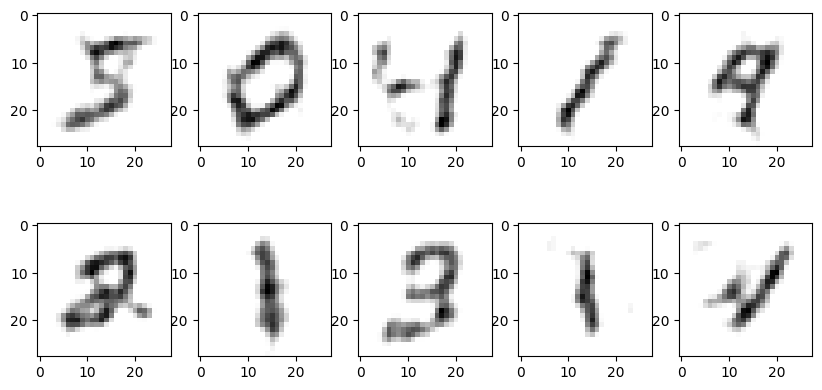

In [49]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_pred[i].reshape((28, 28)), cmap="Greys")
plt.show()